In [1]:
%pylab 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import pandas as pd
import statsmodels.api as sm
import numpy as np

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


# Kcal to Life Expectancy

In [13]:
country_life_exp = pd.read_csv("life_expectancy.csv",skiprows=0)
country_diet_info = pd.read_csv("Food_Supply_kcal_Data.csv",skiprows=0,encoding='utf-8')

#Find all the countries in countries' diet DF in the life expectancy DF
country_list = country_diet_info["Country"]
country_life_exp_2 = country_life_exp.loc[country_life_exp["Country"].isin(country_list)]

#Find all the countries in new life expectancy DF in the countries' diet DF
country_list_2 = country_life_exp_2["Country"]
country_diet_info_2 = country_diet_info.loc[country_diet_info["Country"].isin(country_list_2)]

#Checking length
#print(len(country_diet_info_2["Country"]), len(country_list_2))


country_diet_info_2.index = country_diet_info_2['Country']
country_diet_info_2 = country_diet_info_2.sort_index(axis=0,ascending=True) 


country_life_exp_2.index = country_life_exp_2['Country']
country_life_exp_2 = country_life_exp_2.sort_index(axis=0,ascending=True) 

country_diet_info_2["Life Expectancy"] = country_life_exp_2["Life Expectancy   (both sexes)"]

df_country = country_diet_info_2.drop(columns = ["Country", "Life Expectancy", 'Confirmed', 'Deaths',
                                                'Recovered', 'Active', 'Population', 'Unit (all except Population)', 
                                                'Obesity','Undernourished'])
df_country = df_country.dropna()

In [62]:
import statsmodels.api as sm
clean_diet_info = country_diet_info_2.dropna()
life_exp = clean_diet_info["Life Expectancy"]
obesity = clean_diet_info["Obesity"]
results = sm.OLS(obesity, life_exp).fit()
print(results.summary())

m = results.params[0]
y = life_exp*m

                                 OLS Regression Results                                
Dep. Variable:                Obesity   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              720.1
Date:                Tue, 25 Apr 2023   Prob (F-statistic):                    2.92e-57
Time:                        13:44:31   Log-Likelihood:                         -502.88
No. Observations:                 142   AIC:                                      1008.
Df Residuals:                     141   BIC:                                      1011.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

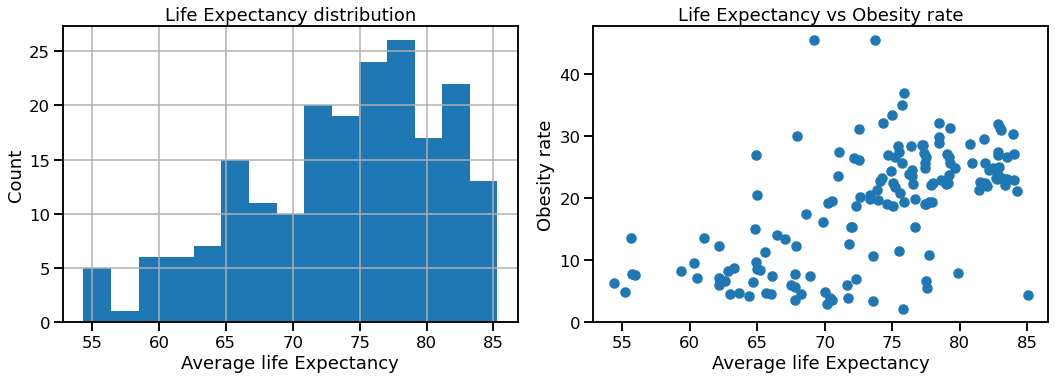

In [66]:
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(country_life_exp["Life Expectancy   (both sexes)"], bins = 15)
plt.title("Life Expectancy distribution")
plt.xlabel("Average life Expectancy")
plt.ylabel("Count")
plt.grid()
fig.tight_layout()
# plt.savefig('Life Expectancy Distibution.png')


plt.subplot(2,2,2)
plt.scatter(country_diet_info_2["Life Expectancy"], country_diet_info_2["Obesity"])
# plt.plot(clean_diet_info["Life Expectancy"], y, color = 'red')
plt.title("Life Expectancy vs Obesity rate")
plt.xlabel("Average life Expectancy")
plt.ylabel("Obesity rate")
fig.tight_layout()
# plt.savefig('Life Exp vs Obesity rate.png')

plt.show()

# Calories(Kcal) to Life Expectancy

In [15]:
model_f = sm.OLS(country_diet_info_2["Life Expectancy"], df_country).fit()
print(model_f.summary())

                                 OLS Regression Results                                
Dep. Variable:        Life Expectancy   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2517.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):                   1.08e-161
Time:                        13:05:01   Log-Likelihood:                         -411.93
No. Observations:                 154   AIC:                                      869.9
Df Residuals:                     131   BIC:                                      939.7
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

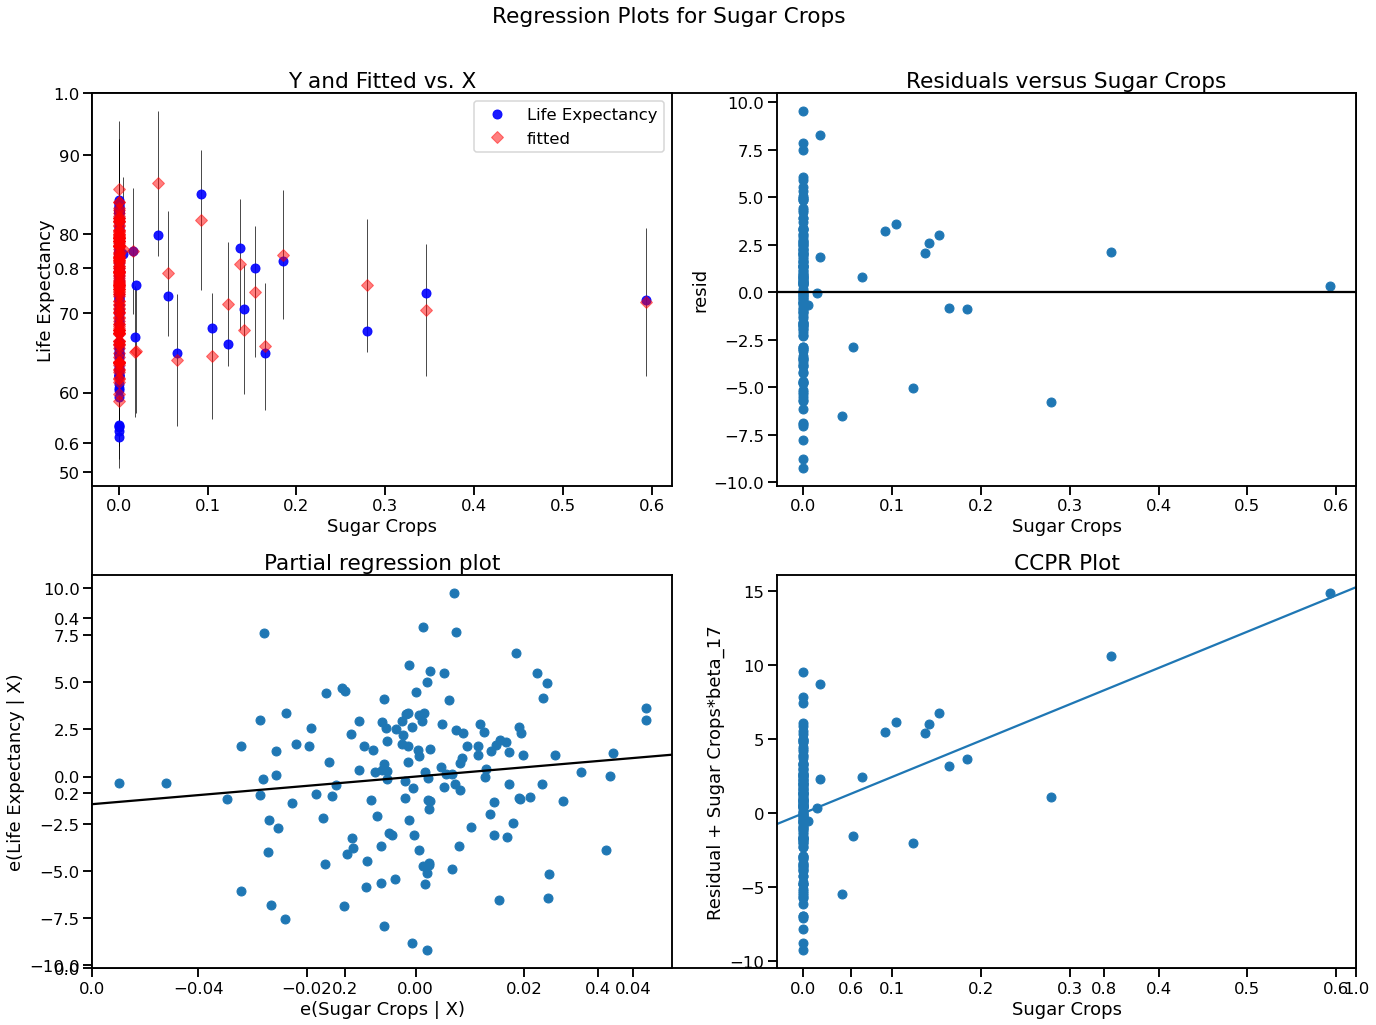

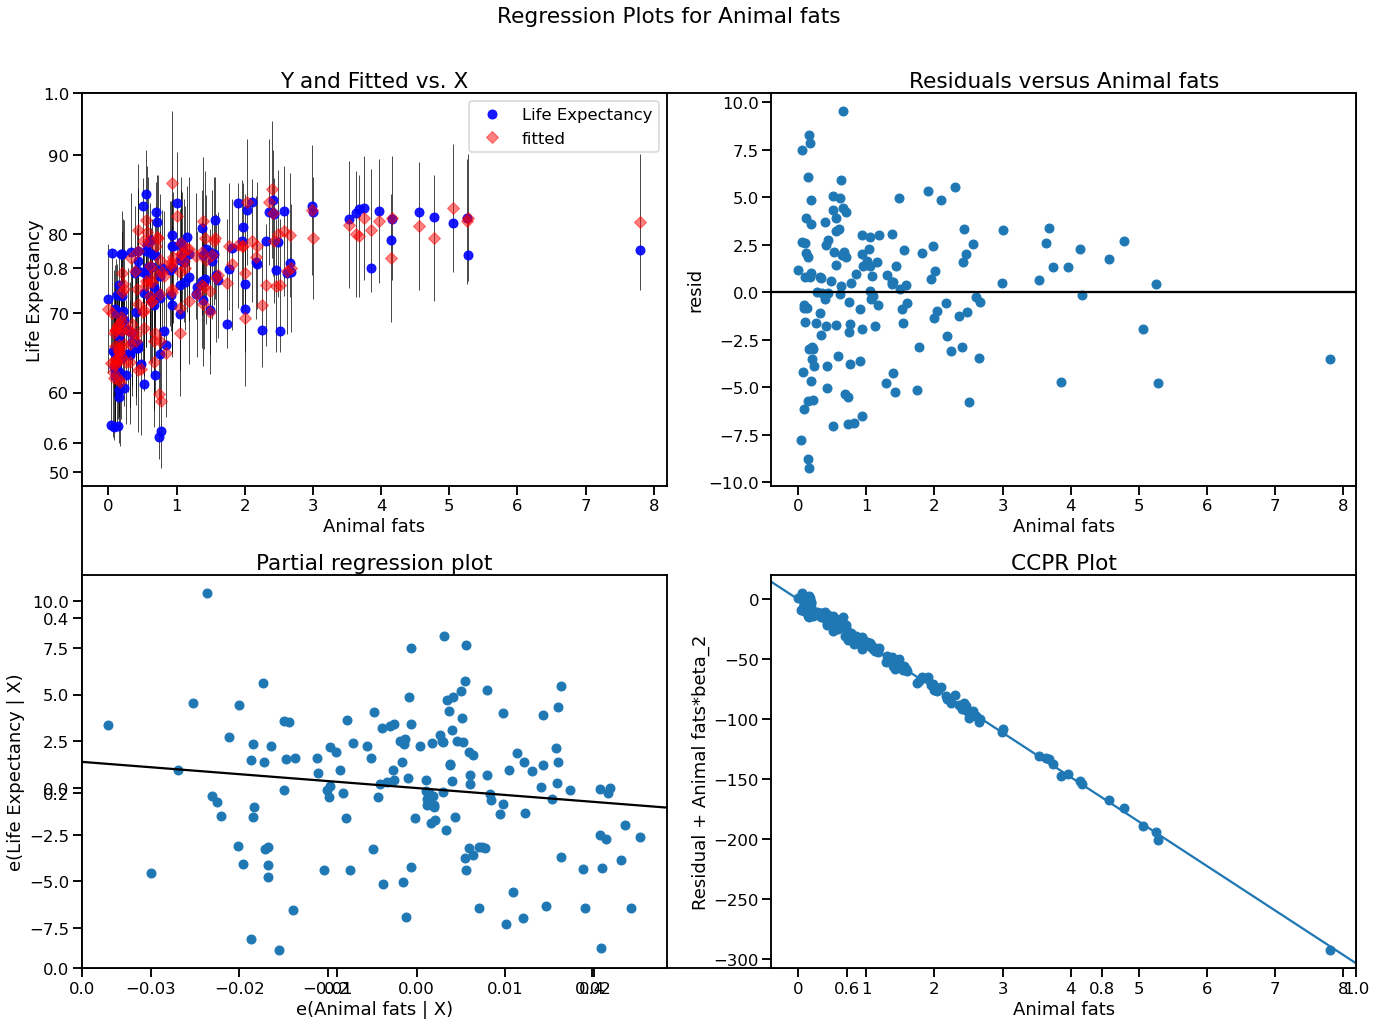

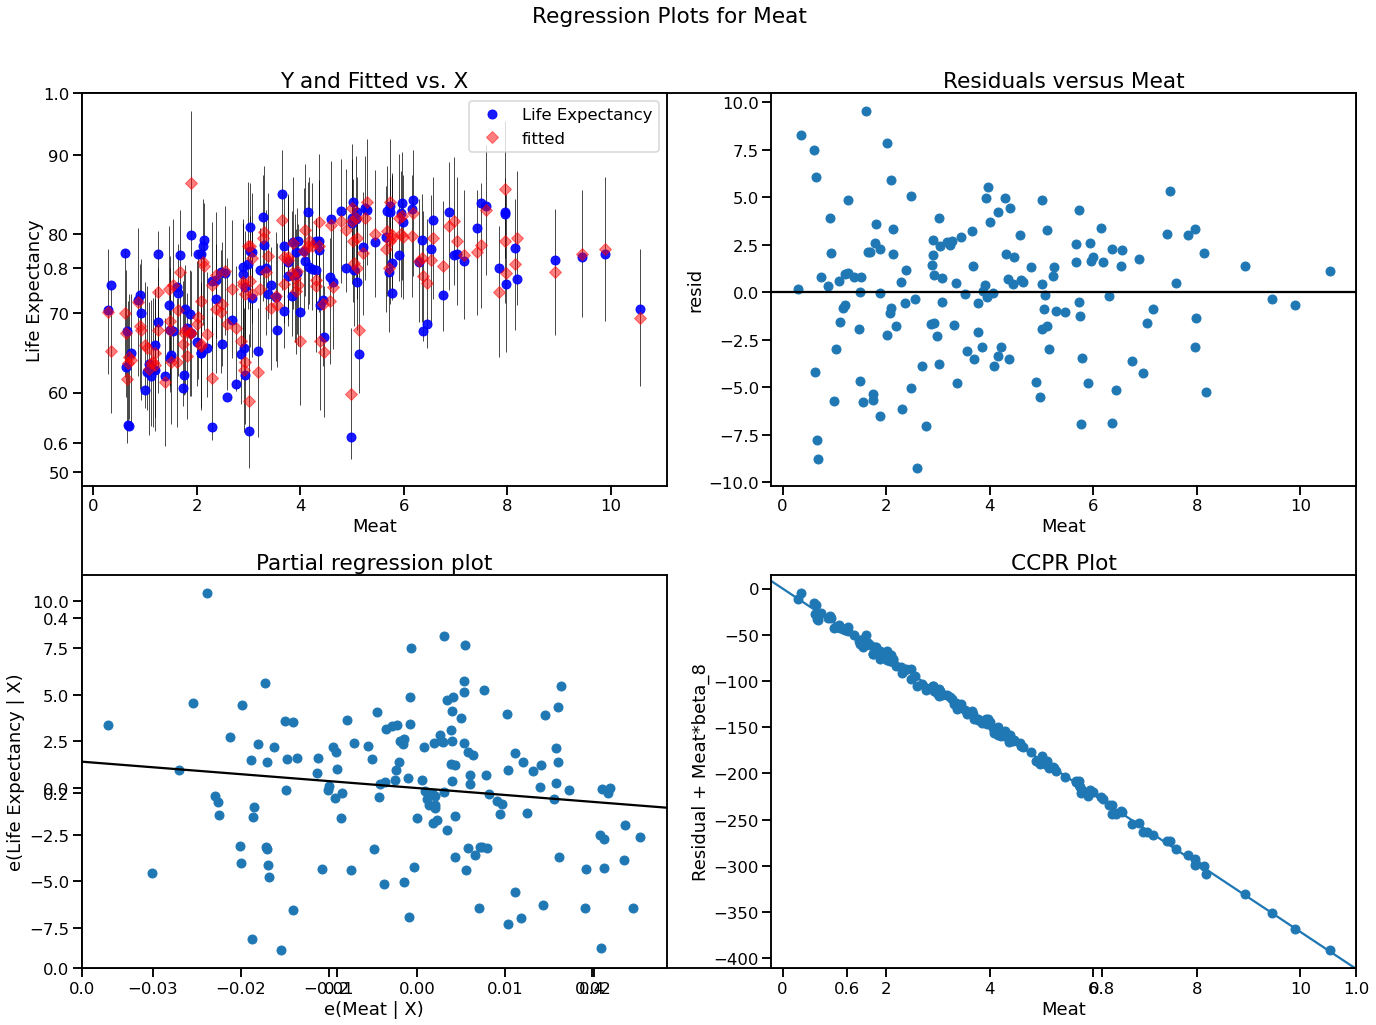

In [20]:
features = ["Sugar Crops", "Animal fats", "Meat"]
for f in features:
    fig = plt.figure( figsize= (20, 15))
    ax = fig.add_subplot(111)
    fig = sm.graphics.plot_regress_exog(model_f, f, fig=fig)
    filename = f + "_Regression_plt" + ".png"
    plt.savefig(filename)
    plt.show()


# Protien to Life Expectancy

In [7]:
country_diet_info = pd.read_csv("Protein_Supply_Quantity_Data.csv",skiprows=0)
country_diet_info = country_diet_info.drop(columns = ['Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit (all except Population)', 'Obesity', 'Undernourished'])

country_life_exp = pd.read_csv("life_expectancy.csv",skiprows=0)


#Find all the countries in countries' diet DF in the life expectancy DF
country_list = country_diet_info["Country"]
country_life_exp_2 = country_life_exp.loc[country_life_exp["Country"].isin(country_list)]

#Find all the countries in new life expectancy DF in the countries' diet DF
country_list_2 = country_life_exp_2["Country"]
country_diet_info_2 = country_diet_info.loc[country_diet_info["Country"].isin(country_list_2)]

#Checking length
#print(len(country_diet_info_2["Country"]), len(country_list_2))


country_diet_info_2.index = country_diet_info_2['Country']
country_diet_info_2 = country_diet_info_2.sort_index(axis=0,ascending=True) 


country_life_exp_2.index = country_life_exp_2['Country']
country_life_exp_2 = country_life_exp_2.sort_index(axis=0,ascending=True) 

country_diet_info_2["Life Expectancy"] = country_life_exp_2["Life Expectancy   (both sexes)"]

df_country = country_diet_info_2.drop(columns = ["Country", "Life Expectancy"])


model_f = sm.OLS(country_diet_info_2["Life Expectancy"], df_country).fit()
print(model_f.summary())

                                 OLS Regression Results                                
Dep. Variable:        Life Expectancy   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2507.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):                   1.37e-161
Time:                        16:04:35   Log-Likelihood:                         -412.22
No. Observations:                 154   AIC:                                      870.4
Df Residuals:                     131   BIC:                                      940.3
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

# Fat  to Life Expectancy

In [6]:
country_diet_info = pd.read_csv("Fat_Supply_Quantity_Data.csv",skiprows=0)
country_diet_info = country_diet_info.drop(columns = ['Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit (all except Population)', 'Obesity', 'Undernourished'])

country_life_exp = pd.read_csv("life_expectancy.csv",skiprows=0)


#Find all the countries in countries' diet DF in the life expectancy DF
country_list = country_diet_info["Country"]
country_life_exp_2 = country_life_exp.loc[country_life_exp["Country"].isin(country_list)]

#Find all the countries in new life expectancy DF in the countries' diet DF
country_list_2 = country_life_exp_2["Country"]
country_diet_info_2 = country_diet_info.loc[country_diet_info["Country"].isin(country_list_2)]

#Checking length
#print(len(country_diet_info_2["Country"]), len(country_list_2))


country_diet_info_2.index = country_diet_info_2['Country']
country_diet_info_2 = country_diet_info_2.sort_index(axis=0,ascending=True) 


country_life_exp_2.index = country_life_exp_2['Country']
country_life_exp_2 = country_life_exp_2.sort_index(axis=0,ascending=True) 

country_diet_info_2["Life Expectancy   (both sexes)"] = country_life_exp_2["Life Expectancy   (both sexes)"]

df_country = country_diet_info_2.drop(columns = ["Country", "Life Expectancy   (both sexes)"])


model_f = sm.OLS(country_diet_info_2["Life Expectancy   (both sexes)"], df_country).fit()
print(model_f.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Life Expectancy   (both sexes)   R-squared (uncentered):                   0.997
Model:                                        OLS   Adj. R-squared (uncentered):              0.996
Method:                             Least Squares   F-statistic:                              1899.
Date:                            Mon, 24 Apr 2023   Prob (F-statistic):                   1.04e-153
Time:                                    17:23:55   Log-Likelihood:                         -433.56
No. Observations:                             154   AIC:                                      913.1
Df Residuals:                                 131   BIC:                                      983.0
Df Model:                                      23                                                  
Covariance Type:                        nonrobust                                                  
